#2. Breast Cancer Prediction

The objective of this project is to create a predictive model that can accurately classify breast cancer cases as benign or malignant based on a set of relevant features. By leveraging historical data and applying machine learning techniques, we aim to develop a reliable tool for assisting medical professionals in diagnosing breast cancer.

#Importing All Necessary Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Importing Breast_cancer_data dataset:

In [ ]:
Breast_cancer_data = pd.read_csv('Breast_cancer_data.csv')
Breast_cancer_data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


#Checking shape of the dataset:
It will give you Number of columns and rows present in the dataset

In [ ]:
Breast_cancer_data.shape

(569, 6)

#Finding to see the how many columns present in the dataset:

In [ ]:
Breast_cancer_data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

#Checking Non-Null Count and Datatype of each column present in the Breast_cancer_data dataset:

In [ ]:
Breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


#Checking null values present in the titanic dataset columnwise:

In [ ]:
Breast_cancer_data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

#Checking Type of data present in each column:

In [ ]:
Breast_cancer_data.mean_radius.unique()

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 , 13.44 ,
       10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 12.05 , 13.49 ,
       11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 , 19.21 , 14.71 ,
       13.05 ,  8.618, 10.17 ,  8.598,  9.173, 12.68 , 14.78 ,  9.465,
       11.31 ,  9.029, 12.78 , 18.94 ,  8.888, 17.2  , 13.8  , 12.31 ,
       16.07 , 13.53 , 18.05 , 20.18 , 12.86 , 11.45 , 13.34 , 25.22 ,
       19.1  , 12.   , 18.46 , 14.48 , 19.02 , 12.36 , 14.64 , 14.62 ,
       15.37 , 13.27 , 13.45 , 15.06 , 20.26 , 12.18 ,  9.787, 11.6  ,
       14.42 , 13.61 ,  6.981,  9.876, 10.49 , 13.11 , 11.64 , 22.27 ,
       11.34 ,  9.777, 12.63 , 14.26 , 10.51 ,  8.726, 11.93 ,  8.95 ,
      

In [ ]:
Breast_cancer_data.mean_texture.unique()

array([10.38, 17.77, 21.25, 20.38, 14.34, 15.7 , 19.98, 20.83, 21.82,
       24.04, 23.24, 17.89, 24.8 , 23.95, 22.61, 27.54, 20.13, 20.68,
       22.15, 14.36, 15.71, 12.44, 14.26, 23.04, 21.38, 16.4 , 21.53,
       20.25, 25.27, 15.05, 25.11, 18.7 , 23.98, 26.47, 17.88, 21.59,
       21.72, 18.42, 25.2 , 20.82, 21.58, 21.35, 24.81, 20.28, 21.81,
       17.6 , 16.84, 18.66, 14.63, 22.3 , 21.6 , 16.34, 18.24, 22.02,
       18.75, 18.57, 19.31, 11.79, 14.88, 20.98, 13.86, 23.84, 23.94,
       21.01, 19.04, 17.33, 16.49, 21.31, 14.64, 24.52, 15.79, 16.52,
       19.65, 10.94, 16.15, 23.97, 18.  , 20.97, 15.86, 24.91, 26.29,
       15.65, 18.52, 21.46, 24.59, 21.8 , 15.24, 24.02, 22.76, 14.76,
       18.3 , 19.83, 23.03, 17.84, 19.94, 12.84, 19.77, 24.98, 13.43,
       20.52, 19.4 , 19.29, 15.56, 18.33, 18.54, 19.67, 21.26, 16.99,
       20.76, 20.19, 15.83, 15.76, 16.67, 22.91, 20.01, 10.82, 17.12,
       20.2 , 10.89, 16.39, 17.21, 24.69, 18.91, 25.12, 13.29, 19.48,
       21.54, 13.93,

In [ ]:
Breast_cancer_data.mean_perimeter.unique()

array([122.8 , 132.9 , 130.  ,  77.58, 135.1 ,  82.57, 119.6 ,  90.2 ,
        87.5 ,  83.97, 102.7 , 103.6 , 132.4 , 103.7 ,  93.6 ,  96.73,
        94.74, 108.1 ,  87.46,  85.63,  60.34, 102.5 , 137.2 , 110.  ,
       116.  ,  97.41, 122.1 , 102.4 , 115.  , 124.8 ,  77.93, 112.8 ,
       127.9 , 107.  , 110.1 ,  93.63,  82.61,  95.54,  88.4 ,  86.18,
        71.9 , 128.3 ,  87.32,  85.42, 123.7 ,  51.71,  85.98,  78.04,
        86.91,  74.72,  87.21,  75.71, 120.3 ,  97.26,  73.34, 125.5 ,
        95.55,  54.34,  64.55,  54.66,  96.42,  59.2 ,  82.69,  97.4 ,
        60.11,  71.8 ,  58.79,  81.37, 123.6 , 114.2 ,  90.43,  79.19,
       104.1 ,  87.91, 120.2 , 143.7 ,  83.19,  73.81,  86.49, 171.5 ,
       129.1 ,  76.95, 121.1 ,  94.25, 122.  ,  79.78,  95.77,  94.57,
       100.2 ,  84.74,  86.6 , 100.3 ,  77.79,  62.11,  74.34,  94.48,
        88.05,  43.79,  77.22,  63.95,  67.41,  75.17,  79.01, 152.8 ,
        72.48,  62.5 ,  82.15,  97.83,  68.64,  55.84,  76.53,  58.74,
      

In [ ]:
Breast_cancer_data.mean_area.unique()

array([1001. , 1326. , 1203. ,  386.1, 1297. ,  477.1, 1040. ,  577.9,
        519.8,  475.9,  797.8,  781. , 1123. ,  782.7,  578.3,  658.8,
        684.5,  798.8, 1260. ,  566.3,  520. ,  273.9,  704.4, 1404. ,
        904.6,  912.7,  644.8, 1094. ,  732.4,  955.1, 1088. ,  440.6,
        899.3, 1162. ,  807.2,  869.5,  633. ,  523.8,  698.8,  559.2,
        563. ,  371.1, 1104. ,  545.2,  531.5, 1076. ,  201.9,  534.6,
        449.3,  561. ,  427.9,  571.8,  437.6, 1033. ,  712.8,  409. ,
       1152. ,  656.9,  527.2,  224.5,  311.9,  221.8,  645.7,  260.9,
        499. ,  668.3,  269.4,  394.1,  250.5,  502.5, 1130. ,  244. ,
        929.4,  584.1,  470.9,  817.7, 1006. , 1245. ,  506.3,  401.5,
       1878. , 1132. ,  443.3, 1075. ,  648.2,  466.1,  651.9,  662.7,
        728.2,  551.7,  555.1,  705.6, 1264. ,  451.1,  294.5,  412.6,
        642.5,  582.7,  143.5,  458.7,  298.3,  336.1,  530.2,  412.5,
        466.7, 1509. ,  396.5,  290.2,  480.4,  629.9,  334.2,  230.9,
      

In [ ]:
Breast_cancer_data.mean_smoothness.unique()

array([0.1184 , 0.08474, 0.1096 , 0.1425 , 0.1003 , 0.1278 , 0.09463,
       0.1189 , 0.1273 , 0.1186 , 0.08206, 0.0971 , 0.0974 , 0.08401,
       0.1131 , 0.1139 , 0.09867, 0.117  , 0.09831, 0.09779, 0.1075 ,
       0.1024 , 0.1073 , 0.09428, 0.1121 , 0.1054 , 0.0944 , 0.1082 ,
       0.09847, 0.1064 , 0.1109 , 0.1197 , 0.09401, 0.104  , 0.0961 ,
       0.09823, 0.08983, 0.09387, 0.1016 , 0.08162, 0.1227 , 0.09081,
       0.1041 , 0.09714, 0.1099 , 0.086  , 0.1158 , 0.1031 , 0.08752,
       0.08637, 0.07685, 0.08261, 0.1148 , 0.09056, 0.09524, 0.1053 ,
       0.1137 , 0.0806 , 0.09752, 0.1134 , 0.1243 , 0.1049 , 0.07721,
       0.1122 , 0.1172 , 0.1044 , 0.08139, 0.1066 , 0.09009, 0.09783,
       0.1071 , 0.1007 , 0.09172, 0.09168, 0.1291 , 0.1065 , 0.1286 ,
       0.09934, 0.1102 , 0.1078 , 0.1063 , 0.1215 , 0.09723, 0.09874,
       0.09444, 0.09029, 0.08772, 0.1132 , 0.08974, 0.092  , 0.07355,
       0.1022 , 0.1039 , 0.09078, 0.1045 , 0.09488, 0.08013, 0.1005 ,
       0.09989, 0.13

In [ ]:
Breast_cancer_data.diagnosis.unique()

array([0, 1])

#Describe the dataset:

In [ ]:
Breast_cancer_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


#Finding duplicate rows in Table:

In [ ]:
Breast_cancer_data.duplicated().sum()

0

#Finding outliers in numeric columns:

In [ ]:
#Function to count outliers based on IQR
def count_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Iterate through each column in the DataFrame
for column in Breast_cancer_data.columns:
    if Breast_cancer_data[column].dtype in [np.int64, np.float64]:  # Only consider numerical columns
        total_outliers = count_outliers_iqr(Breast_cancer_data[column])
        print(f"Total outliers in {column}: {total_outliers}")

#these outliers are valid outliers.no need to replace it with any values.keep it as it is

Total outliers in mean_radius: 14
Total outliers in mean_texture: 7
Total outliers in mean_perimeter: 13
Total outliers in mean_area: 25
Total outliers in mean_smoothness: 6
Total outliers in diagnosis: 0


#Distribution of numeric columns:

<Axes: xlabel='mean_radius', ylabel='Count'>

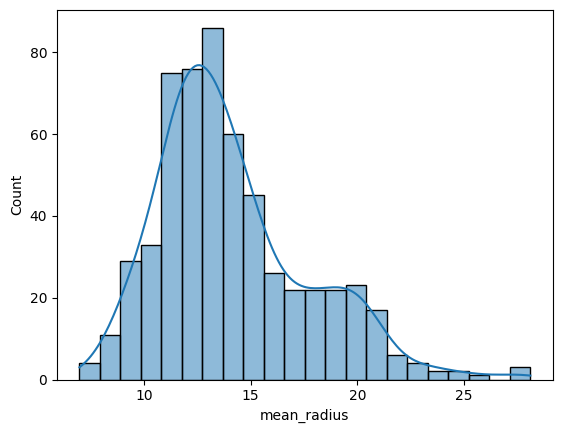

In [ ]:
sns.histplot(x = Breast_cancer_data['mean_radius'],kde = True)

<Axes: xlabel='mean_texture', ylabel='Count'>

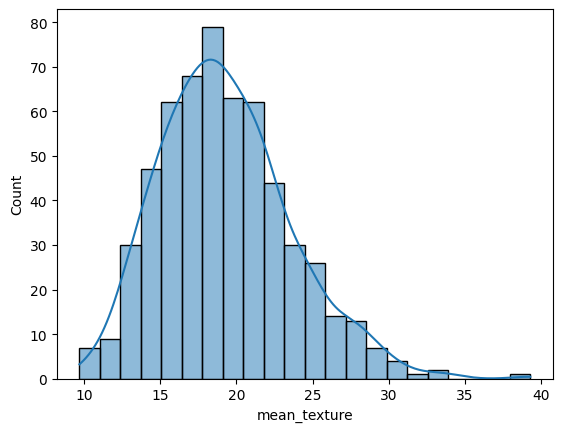

In [ ]:
sns.histplot(x = Breast_cancer_data['mean_texture'],kde = True)

<Axes: xlabel='mean_perimeter', ylabel='Count'>

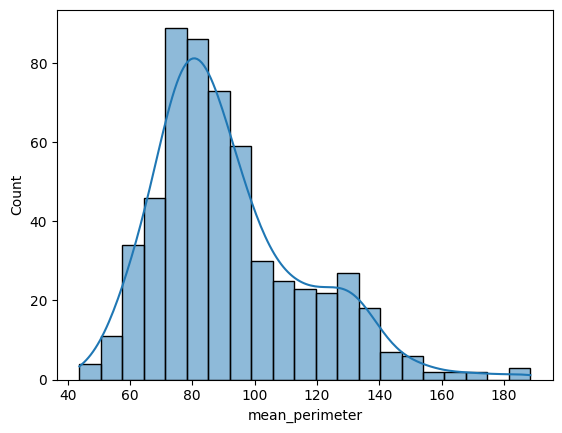

In [ ]:
sns.histplot(x = Breast_cancer_data['mean_perimeter'],kde = True)

<Axes: xlabel='mean_area', ylabel='Count'>

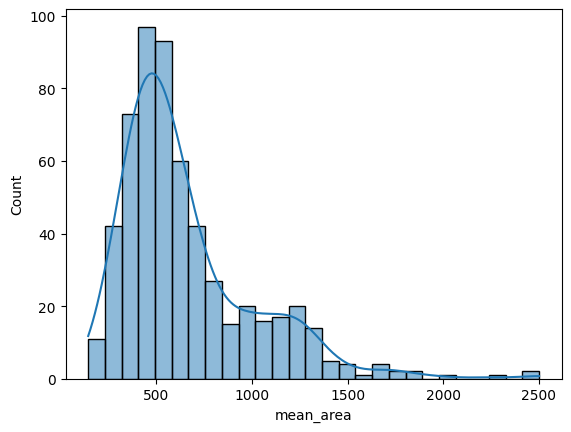

In [ ]:
sns.histplot(x = Breast_cancer_data['mean_area'],kde = True)

<Axes: xlabel='mean_smoothness', ylabel='Count'>

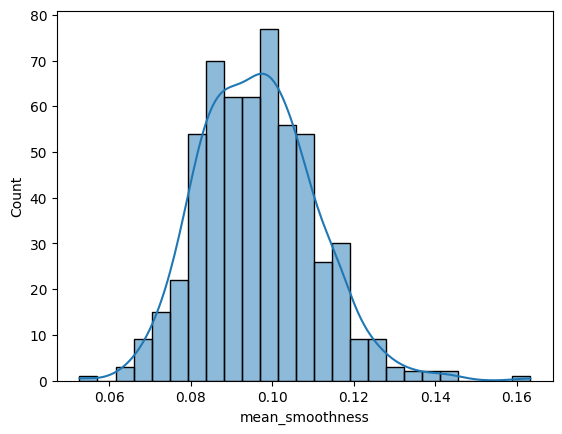

In [ ]:
sns.histplot(x = Breast_cancer_data['mean_smoothness'],kde = True)

<Axes: >

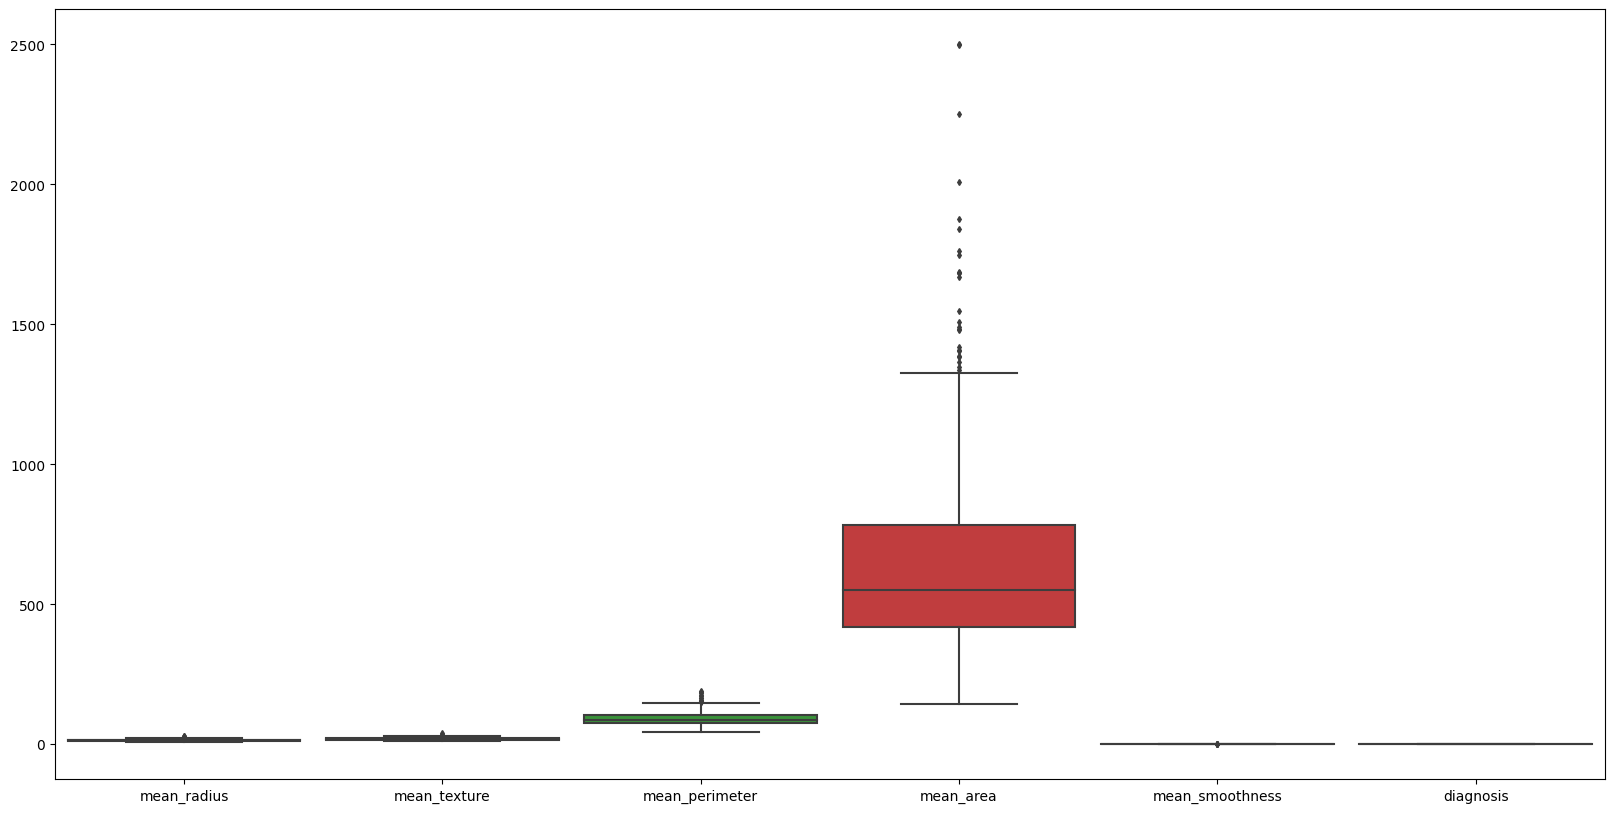

In [ ]:
fig,ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = Breast_cancer_data,width = 0.9,fliersize = 3)

#Checking zeros in the dataset columnwise:

In [ ]:
# Sum of counts of zeros for each column
zeros_sum = (Breast_cancer_data == 0).sum()

print(zeros_sum)

mean_radius          0
mean_texture         0
mean_perimeter       0
mean_area            0
mean_smoothness      0
diagnosis          212
dtype: int64


#Selecting Indepenent variables:

In [ ]:
X = Breast_cancer_data[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


#performing Log Transformation Sqrt Transformation and to get the Normalization of Skewed Data:

In [ ]:
X['mean_radius'] = np.log(X['mean_radius'])

<ipython-input-25-ea880704fabc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mean_radius'] = np.log(X['mean_radius'])


In [ ]:
X['mean_texture'] = np.log(X['mean_texture'])

<ipython-input-26-0b7d6de7fece>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mean_texture'] = np.log(X['mean_texture'])


In [ ]:
X['mean_perimeter'] = np.log(X['mean_perimeter'])

<ipython-input-27-3409bd44bce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mean_perimeter'] = np.log(X['mean_perimeter'])


In [ ]:
X['mean_area'] = np.log(X['mean_area'])

<ipython-input-28-1cb0344f736b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mean_area'] = np.log(X['mean_area'])


In [ ]:
X['mean_smoothness'] = np.log(X['mean_smoothness'])

<ipython-input-29-c2e1c67be887>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mean_smoothness'] = np.log(X['mean_smoothness'])


#After Log transformation again checking Distribution of numeric columns:

<Axes: xlabel='mean_radius', ylabel='Count'>

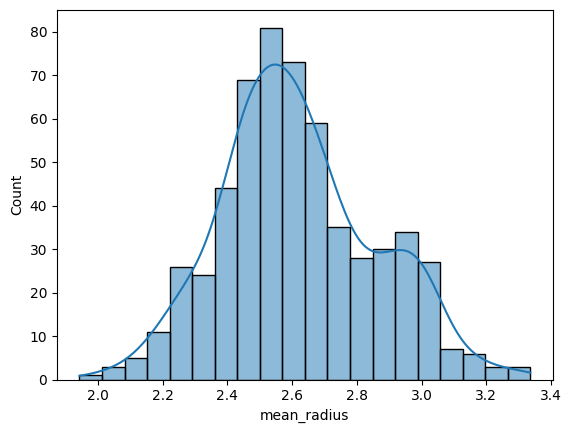

In [ ]:
sns.histplot(x = X['mean_radius'],kde = True)

<Axes: xlabel='mean_texture', ylabel='Count'>

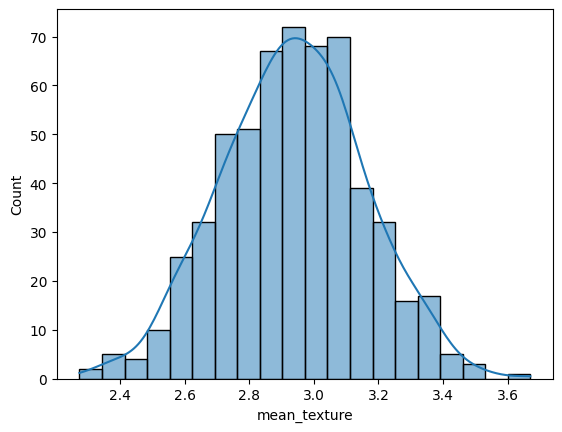

In [ ]:
sns.histplot(x = X['mean_texture'],kde = True)

<Axes: xlabel='mean_perimeter', ylabel='Count'>

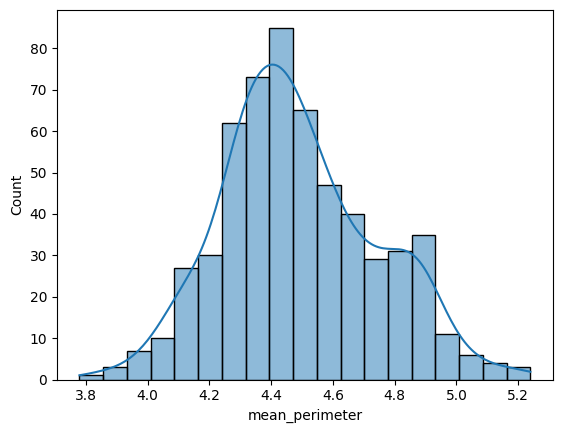

In [ ]:
sns.histplot(x = X['mean_perimeter'],kde = True)

<Axes: xlabel='mean_area', ylabel='Count'>

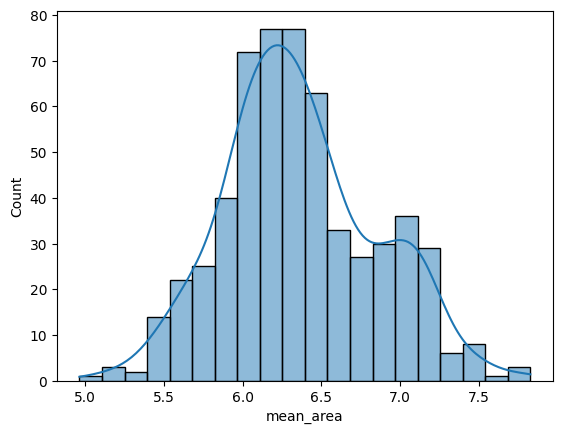

In [ ]:
sns.histplot(x = X['mean_area'],kde = True)

<Axes: xlabel='mean_smoothness', ylabel='Count'>

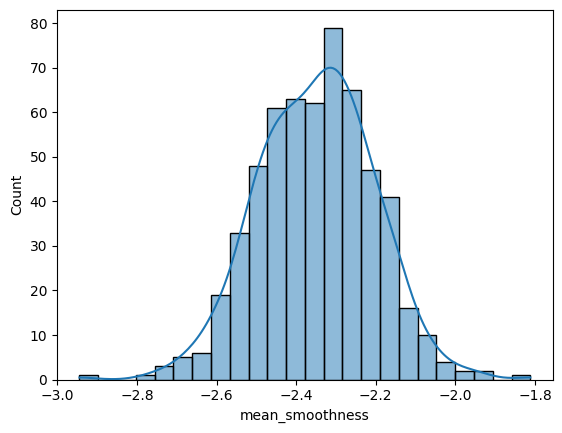

In [ ]:
sns.histplot(x = X['mean_smoothness'],kde = True)

In [ ]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,2.889816,2.339881,4.810557,6.908755,-2.133687
1,3.023834,2.877512,4.889597,7.189922,-2.468168
2,2.980111,3.056357,4.867534,7.092574,-2.210918
3,2.435366,3.014554,4.351310,5.956096,-1.948413
4,3.010128,2.663053,4.906015,7.167809,-2.299590
...,...,...,...,...,...
564,3.070840,3.108614,4.955827,7.299121,-2.198225
565,3.002211,3.341093,4.876723,7.139660,-2.324831
566,2.809403,3.335058,4.684905,6.754721,-2.470412
567,3.025291,3.378611,4.942356,7.142827,-2.138767


#Performing StandardScaling:

In [ ]:
columns_to_scale = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']

scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

<ipython-input-36-0ea35d1f0027>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])


In [ ]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.137432,-2.699007,1.281106,1.130212,1.488710
1,1.700581,-0.261824,1.596178,1.712684,-0.811015
2,1.516856,0.548916,1.508232,1.511015,0.957706
3,-0.772188,0.359416,-0.549561,-0.843332,2.762558
4,1.642990,-1.234007,1.661625,1.666874,0.348043
...,...,...,...,...,...
564,1.898103,0.785809,1.860186,1.938903,1.044976
565,1.609722,1.839681,1.544859,1.608560,0.174498
566,0.799531,1.812320,0.780229,0.811112,-0.826448
567,1.706705,2.009755,1.806489,1.615121,1.453780


#Selecting Target Variable:

In [ ]:
y = Breast_cancer_data[['diagnosis']]
y

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


#Split the dataset into X_train, X_test, y_train, y_test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
293,-0.616873,-0.341604,-0.655783,-0.607275,-0.894276
332,-0.846431,0.242249,-0.850430,-0.836903,0.689047
565,1.609722,1.839681,1.544859,1.608560,0.174498
278,-0.041166,-0.244002,-0.127720,-0.028012,-1.251613
489,0.822252,0.319200,0.735813,0.809905,-1.653262
...,...,...,...,...,...
277,1.324729,0.269558,1.218948,1.329351,-0.456036
9,-0.405949,1.108141,-0.234051,-0.410133,1.500315
359,-1.574082,-0.123644,-1.585860,-1.519341,0.389051
192,-1.449477,-0.148457,-1.525677,-1.449878,-2.174159


In [ ]:
X_test

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
512,-0.100329,0.390450,-0.018301,-0.085265,1.020154
457,-0.160337,1.330752,-0.227884,-0.156433,-0.558506
439,0.089731,-0.834828,0.024194,0.092228,-1.236060
298,0.161054,-0.160914,0.096068,0.181149,-2.554478
37,-0.217988,-0.098967,-0.299141,-0.211460,-0.409958
...,...,...,...,...,...
236,2.207976,1.629485,2.170608,2.190516,-0.018709
113,-1.121122,0.316955,-1.037612,-1.142384,1.118906
527,-0.446614,-1.940711,-0.480286,-0.442599,-0.394667
76,-0.059759,-2.460811,-0.051266,-0.075982,2.083569


In [ ]:
y_train

,diagnosis
293,1
332,1
565,0
278,1
489,0
...,...
277,0
9,0
359,1
192,1


In [ ]:
y_test

,diagnosis
512,0
457,1
439,1
298,1
37,1
...,...
236,0
113,1
527,1
76,1


#1)LogisticRegression:

In [ ]:
# Initialize your model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
LogisticRegression_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {LogisticRegression_train_accuracy}')

# Calculate testing accuracy
LogisticRegression_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {LogisticRegression_test_accuracy}')

# Confusion matrix and classification report for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, train_predictions))

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

# Confusion matrix and classification report for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, test_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

Training Accuracy: 0.9436619718309859
Testing Accuracy: 0.9300699300699301
Confusion Matrix (Training Data):
[[146  13]
 [ 11 256]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       159
           1       0.95      0.96      0.96       267

    accuracy                           0.94       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426


Confusion Matrix (Testing Data):
[[48  5]
 [ 5 85]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        53
           1       0.94      0.94      0.94        90

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#2)Support Vector Machine:

In [ ]:
# Initialize your model
model = svm.SVC(kernel='linear')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
SVM_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {SVM_train_accuracy}')

# Calculate testing accuracy
SVM_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {SVM_test_accuracy}')
# Confusion matrix and classification report for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, train_predictions))

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

# Confusion matrix and classification report for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, test_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

Training Accuracy: 0.9436619718309859
Testing Accuracy: 0.9300699300699301
Confusion Matrix (Training Data):
[[145  14]
 [ 10 257]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       159
           1       0.95      0.96      0.96       267

    accuracy                           0.94       426
   macro avg       0.94      0.94      0.94       426
weighted avg       0.94      0.94      0.94       426


Confusion Matrix (Testing Data):
[[49  4]
 [ 6 84]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.95      0.93      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#3)RandomForestClassifier:

In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
# Initialize your model (in this example, RandomForestClassifier is used)
model = RandomForestClassifier(n_estimators= 9, criterion="entropy")

# Initialize your model (in this example, RandomForestClassifier is used)
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
Random_Forest_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {Random_Forest_train_accuracy}')

# Calculate testing accuracy
Random_Forest_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {Random_Forest_test_accuracy}')

# Confusion matrix and classification report for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, train_predictions))

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

# Confusion matrix and classification report for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, test_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

<ipython-input-46-666c3d64ab92>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training Accuracy: 1.0
Testing Accuracy: 0.9440559440559441
Confusion Matrix (Training Data):
[[159   0]
 [  0 267]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


Confusion Matrix (Testing Data):
[[49  4]
 [ 4 86]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



#4)GradientBoostingClassifier:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize your model (in this example, GradientBoostingClassifier is used)
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
GradientBoosting_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {GradientBoosting_train_accuracy}')

# Calculate testing accuracy
GradientBoosting_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {GradientBoosting_test_accuracy}')
# Confusion matrix and classification report for training data
print("Confusion Matrix (Training Data):")
print(confusion_matrix(y_train, train_predictions))

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

# Confusion matrix and classification report for testing data
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, test_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 1.0
Testing Accuracy: 0.9300699300699301
Confusion Matrix (Training Data):
[[159   0]
 [  0 267]]

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


Confusion Matrix (Testing Data):
[[49  4]
 [ 6 84]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.95      0.93      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [ ]:
# Print the results
print("Logistic Regression:")
print(f'Training Accuracy: {LogisticRegression_train_accuracy}')
print(f'Testing Accuracy: {LogisticRegression_test_accuracy}\n')

print("SVM:")
print(f'Training Accuracy: {SVM_train_accuracy}')
print(f'Testing Accuracy: {SVM_test_accuracy}\n')

print("Random Forest:")
print(f'Training Accuracy: {Random_Forest_train_accuracy}')
print(f'Testing Accuracy: {Random_Forest_test_accuracy}\n')

print("Gradient Boosting:")
print(f'Training Accuracy: {GradientBoosting_train_accuracy}')
print(f'Testing Accuracy: {GradientBoosting_test_accuracy}\n')

Logistic Regression:
Training Accuracy: 0.9436619718309859
Testing Accuracy: 0.9300699300699301

SVM:
Training Accuracy: 0.9436619718309859
Testing Accuracy: 0.9300699300699301

Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.9440559440559441

Gradient Boosting:
Training Accuracy: 1.0
Testing Accuracy: 0.9300699300699301

